In [0]:
import os

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
data_path = ('/content/drive/My Drive/Cats-Human-Dogs-Horse Dataset')

folders = os.listdir(data_path)

In [0]:
for f in folders:
  path =os.path.join(data_path,f)
  print(str(len(os.listdir(path)))+" "+f)

202 dogs
202 humans
202 horses
202 cats


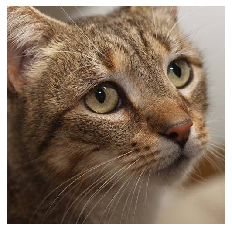

In [13]:
from keras.preprocessing import image
import matplotlib.pyplot as plt
sample_path = os.path.join(data_path,"cats/cat.54.jpg")
img = image.load_img(sample_path)
plt.imshow(img)
plt.axis("off")
plt.show()

In [41]:
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D

model = Sequential()
model.add(Conv2D(64,(3,3),activation ='relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(64,(3,3),activation = 'relu',input_shape = (150,150,3)))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Conv2D(128,(3,3),activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(Flatten())
model.add(Dense(64,activation = 'relu'))
model.add(Dense(4,activation = 'softmax'))
model.summary()


Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 15, 15, 128)      

In [42]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['acc'])



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [43]:
from keras.preprocessing.image import ImageDataGenerator
train_gen = ImageDataGenerator(rescale = 1.0/255)
train_generator = train_gen.flow_from_directory(
    data_path,
    target_size = (150,150),
    batch_size = 32,
    class_mode = 'categorical'
)

Found 808 images belonging to 4 classes.


In [45]:
x,y = train_generator.next()
print(x.shape)
print(y.shape)

(32, 150, 150, 3)
(32, 4)


In [47]:
history = model.fit_generator(
    train_generator,
    epochs = 20,
    steps_per_epoch = 7,
    shuffle = True
                              )

Epoch 1/20
7/7 [==============================] - 17s 2s/step - loss: 0.2518 - acc: 0.8906
Epoch 2/20
7/7 [==============================] - 15s 2s/step - loss: 0.3264 - acc: 0.8410
Epoch 3/20
7/7 [==============================] - 15s 2s/step - loss: 0.3886 - acc: 0.8181
Epoch 4/20
7/7 [==============================] - 15s 2s/step - loss: 0.3182 - acc: 0.8583
Epoch 5/20
7/7 [==============================] - 15s 2s/step - loss: 0.3328 - acc: 0.8404
Epoch 6/20
7/7 [==============================] - 15s 2s/step - loss: 0.2868 - acc: 0.8728
Epoch 7/20
7/7 [==============================] - 13s 2s/step - loss: 0.3576 - acc: 0.8496
Epoch 8/20
7/7 [==============================] - 16s 2s/step - loss: 0.3024 - acc: 0.8560
Epoch 9/20
7/7 [==============================] - 15s 2s/step - loss: 0.3188 - acc: 0.8460
Epoch 10/20
7/7 [==============================] - 13s 2s/step - loss: 0.2457 - acc: 0.9060
Epoch 11/20
7/7 [==============================] - 14s 2s/step - loss: 0.2627 - acc: 0.87

Making Validation Data

In [0]:
os.mkdir('/content/drive/My Drive/Cats-Human-Dogs-Horse Validation Dataset')


In [0]:
classes = ["dogs","cats","horses","humans"]
val_path = '/content/drive/My Drive/Cats-Human-Dogs-Horse Validation Dataset'

In [0]:
for c in classes:
  p = os.path.join(val_path,c)
  if not os.path.isdir(p):
    os.mkdir(p)



In [0]:
import shutil
split = 0.9
for f in os.listdir(data_path):
  path = os.path.join(data_path,f)
  imgs = os.listdir(path)
  split_size = int(split*len(imgs))
  files_to_move = imgs[split_size:]

  for img_f in files_to_move:
    src = os.path.join(path,img_f)
    dest = os.path.join(val_path+"/"+f,img_f)
    shutil.move(src,dest)


In [56]:
for c in classes:
  path = os.path.join(data_path,c)
  print(len(os.listdir(path)))

181
181
181
181
